In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn=sql.connect('database.sqlite')

In [3]:
def execute_query(q):
    return pd.read_sql_query(q,conn)

In [4]:
execute_query("SELECT * FROM Salaries Limit 10")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,,307899.46,307899.46,2011,,San Francisco,
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,,303427.55,303427.55,2011,,San Francisco,
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,,302377.73,302377.73,2011,,San Francisco,


1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [5]:
q=''' 
select Jobtitle,avg(TotalPayBenefits) Average_Pay_Benifits from Salaries
 where Jobtitle!="Not Provided" and JobTitle!="Not provided"
  group by JobTitle 
'''
execute_query(q)

,JobTitle,Average_Pay_Benifits
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
4,ACUPUNCTURIST,67594.400000
...,...,...
2153,X-RAY LABORATORY AIDE,52705.880385
2154,X-Ray Laboratory Aide,69521.123200
2155,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2156,Youth Comm Advisor,60118.550000


2. Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [6]:
q=''' 
select year,Jobtitle,count(JobTitle) Employees_count from Salaries
 where Jobtitle!="Not Provided" and JobTitle!="Not provided"
  group by Year order by Employees_count desc
'''
execute_query(q)

,Year,JobTitle,Employees_count
0,2014,Deputy Chief 3,38119
1,2013,Chief of Police,37606
2,2012,"Lieutenant, Fire Suppression",36766
3,2011,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,36159


3. What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [ ]:
q=''' 
select count(distinct EmployeeName) unique_employees from Salaries
 where EmployeeName!="Not Provided" or EmployeeName!="Not provided"
'''
execute_query(q)

,unique_employees
0,110809


4. Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [ ]:
q=''' 
select * from Salaries where TotalPayBenefits!="Not Provided" or TotalPayBenefits!="Not provided" 
order by TotalPayBenefits desc 
'''
execute_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,110532,David Shinn,Deputy Chief 3,129150.01,0,342802.63,38780.04,471952.64,510732.68,2014,,San Francisco,PT
3,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,,San Francisco,FT
4,110534,William J Coaker Jr.,Chief Investment Officer,257340,0,82313.7,96570.66,339653.70,436224.36,2014,,San Francisco,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,110529,Timothy E Gibson,Police Officer 3,,0,0,-2.73,0.00,-2.73,2013,,San Francisco,
148651,110530,Mark E Laherty,Police Officer 3,,0,0,-8.2,0.00,-8.20,2013,,San Francisco,
148652,110531,David P Kucia,Police Officer 3,,0,0,-33.89,0.00,-33.89,2013,,San Francisco,


5. Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [28]:
q=''' 
select * from Salaries where (Jobtitle != "Not Provided" and  Jobtitle != "Not Provided")
and 
JobTitle='Firefighter' 
and 
Totalpaybenefits between 125000 and 150000   
'''
execute_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,44540,Randall Henderson,Firefighter,58564.00,24847.86,43458.06,21042.83,126869.92,147912.75,2012,,San Francisco,
1,44554,Virginia Cheung,Firefighter,101379.60,0.00,12353.42,34129.12,113733.02,147862.14,2012,,San Francisco,
2,44577,Travis Hemenez,Firefighter,83546.57,17897.68,12900.30,33319.57,114344.55,147664.12,2012,,San Francisco,
3,44615,Gail Readdie,Firefighter,83386.40,19715.60,11353.05,32997.12,114455.05,147452.17,2012,,San Francisco,
4,44650,Gregory Ginotti,Firefighter,83546.57,22417.40,8597.70,32654.80,114561.67,147216.47,2012,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,123134,Stephen J Kloster,Firefighter,80003.76,6747.13,10438.76,29594.48,97189.65,126784.13,2014,,San Francisco,PT
111,123150,Jeffrey D Ryan,Firefighter,72348.75,9340.89,10815.28,34182.21,92504.92,126687.13,2014,,San Francisco,FT
112,123239,Jovan R Blake,Firefighter,72348.75,7747.96,10699.89,35373.02,90796.60,126169.62,2014,,San Francisco,FT
113,123341,Dino M Cafferata,Firefighter,73002.98,5981.80,10944.68,35751.06,89929.46,125680.52,2014,,San Francisco,FT


6. How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')


In [35]:
q=''' 
select count(Employeename) as "Employee Count"  from Salaries 
where ( basepay!= "Not Provided" and  basepay!= "Not Provided") and ( otherpay!= "Not Provided" and  otherpay!= "Not Provided")
and  
basepay=0 
and 
otherpay=0  
'''
execute_query(q)

,Employee Count
0,80


7. Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

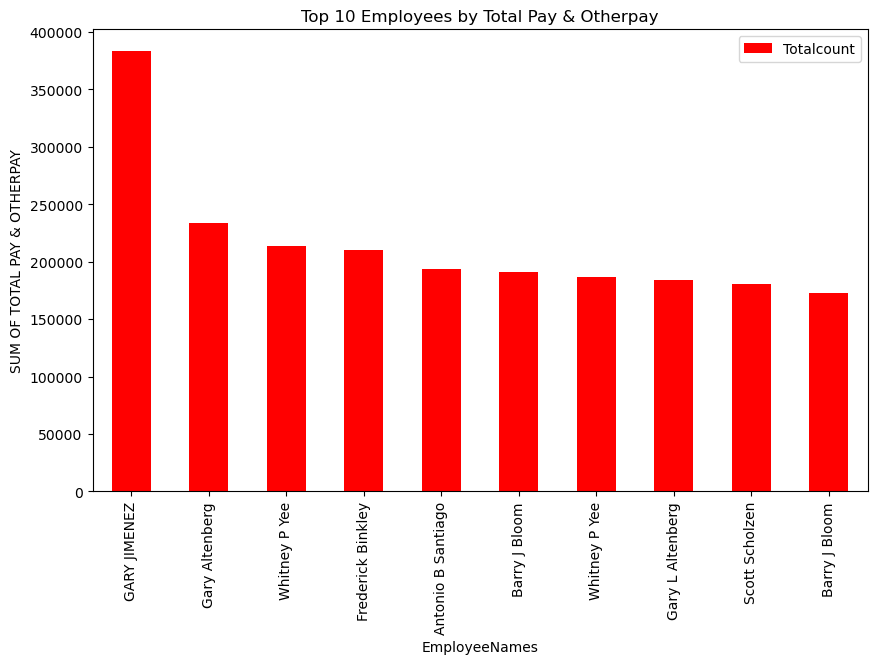

In [64]:
q=''' 
select Employeename,overtimepay+otherpay as Totalcount  from Salaries 
where (overtimepay!= "Not Provided" and  overtimepay!= "Not Provided") and ( otherpay!= "Not Provided" and  otherpay!= "Not Provided")
order by overtimepay desc limit 10
'''
a=execute_query(q)

a.plot(kind='bar', x='EmployeeName', y='Totalcount' , color='red', figsize=(10, 6))

plt.xlabel('EmployeeNames')
plt.ylabel('SUM OF TOTAL PAY & OTHERPAY')
plt.title('Top 10 Employees by Total Pay & Otherpay')

plt.show()

8. Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')


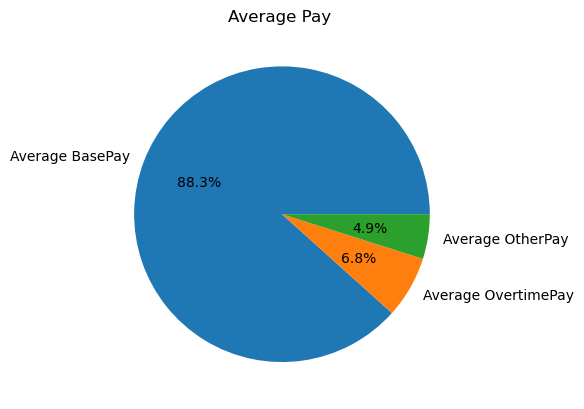

In [86]:
q=''' 
SELECT 'Average BasePay' AS Category, AVG(BasePay) AS Value FROM Salaries  
UNION ALL  
SELECT 'Average OvertimePay', AVG(OvertimePay) FROM Salaries  
UNION ALL  
SELECT 'Average OtherPay', AVG(OtherPay) FROM Salaries  
WHERE OvertimePay != 'Not Provided' AND OtherPay != 'Not Provided';
'''
a=execute_query(q)

plt.pie(a["Value"], labels=a["Category"], autopct='%1.1f%%')
plt.title('Average Pay ')
plt.show()

9. Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')


In [93]:
q=''' 
select jobtitle,avg(Totalpaybenefits) as avg_TotalPayBenifits from Salaries 
where jobtitle!='Not Provided' and Jobtitle!="Not Provided" 
group by Jobtitle
having avg(Totalpaybenefits) > 75000
'''
execute_query(q)

,JobTitle,avg_TotalPayBenifits
0,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
1,ADMINISTRATIVE ANALYST III,92698.515000
2,ADMINISTRATIVE ENGINEER,127961.430000
3,ADMINISTRATIVE SERVICES MANAGER,77015.580000
4,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.440000
...,...,...
1432,Window Cleaner Supervisor,108550.543333
1433,Wire Rope Cable Maint Mechanic,138837.434333
1434,Wire Rope Cable Maint Sprv,242118.323333
1435,Worker's Comp Supervisor 1,96125.531429


10. Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')


In [97]:
q=''' 
select jobtitle,count(EmployeeName) as Employee_count from Salaries 
where jobtitle!='Not Provided' and Jobtitle!="Not Provided" 
group by Jobtitle
having count(jobtitle) > 10
'''
execute_query(q)

,JobTitle,Employee_count
0,ACCOUNT CLERK,83
1,ACCOUNTANT INTERN,48
2,ADMINISTRATIVE ANALYST,93
3,AIRPORT COMMUNICATIONS OPERATOR,27
4,AIRPORT ECONOMIC PLANNER,13
...,...,...
1151,Wire Rope Cable Maint Mechanic,30
1152,Worker's Comp Supervisor 1,14
1153,Worker's Compensation Adjuster,74
1154,X-RAY LABORATORY AIDE,26
